# Introduction 

## Comprehensive analysis of hospital patient details using the following datasets 
## The goal of this analysis is to gain insights into patient demographics, drug prescriptions, diagnoses, and mortality rates.

In [1]:
### Importing the required libraries 

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Importing the dataset using pandas lib

drugs_df = pd.read_csv("drug_code.csv")
diagnostic_df = pd.read_csv("diagnostic_code.csv")
patinent_df = pd.read_csv("patient_data.csv")

### Checking all the uploaded dataset 

In [3]:
drugs_df.head()

,row_id,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,1,97,1669,Type A,101,Drug 1,High,Low
1,2,36,1632,Type B,134,Drug 2,Medium,Low
2,3,3,1054,Type A,181,Drug 3,Medium,Medium
3,4,73,1911,Type A,177,Drug 4,High,Low
4,5,8,1011,Type A,119,Drug 5,High,Medium


In [4]:
diagnostic_df.head()

,row_id,subject_id,hadm_id,seq_num,icd9_code
0,1,13,1521,3,D66
1,2,64,1782,1,D80
2,3,17,1272,3,D81
3,4,9,1935,2,D48
4,5,41,1401,2,D48


In [5]:
patinent_df.head()

,row_id,subject_id,gender,expire_flag
0,1,70,M,0
1,2,83,M,0
2,3,30,F,0
3,4,71,M,0
4,5,74,F,0


In [ ]:
patinent_df.drop

In [6]:
### Checking the shape of every dataset 

print("Drugs dataset shape:", drugs_df.shape)
print("Diagnostic dataset shape:", diagnostic_df.shape)
print("Patient dataset shape:", patinent_df.shape)

Drugs dataset shape: (50, 8)
Diagnostic dataset shape: (100, 5)
Patient dataset shape: (200, 4)


#### Based on the following dataset analysing the following details :-- 

##### 1. High-Risk Patients Details. 
##### 2. Identifying all the patients who were prescribed drugs with a high severity level and had a high mortality rate.
##### 3. Gender Distribution among Expired Patients
##### 4. Percentage of male and female patients among the expired cases.
##### 5. Common Diagnoses for High-Risk Patients
##### 6. Mortality Rate by Diagnosis Type
##### 7. Age of Patients with Common Diagnoses
##### 8. Drug Prescription Trends
##### 9. Gender Disparity in Critical Diagnoses

In [7]:
### Checking the null values in every dataset 

print("Drugs dataset null values:", drugs_df.isnull().sum())
print("Diagnostic dataset null values:", diagnostic_df.isnull().sum())
print("Patient dataset null values:", patinent_df.isnull().sum())

Drugs dataset null values: row_id           0
subject_id       0
hadm_id          0
drg_type         0
drg_code         0
description      0
drg_severity     0
drg_mortality    0
dtype: int64
Diagnostic dataset null values: row_id        0
subject_id    0
hadm_id       0
seq_num       0
icd9_code     0
dtype: int64
Patient dataset null values: row_id         0
subject_id     0
gender         0
expire_flag    0
dtype: int64


##### There is no null values in the dataste 

### Analysing the Drugs dataset 

In [8]:
#### Checking the description 

drugs_df.describe()

,row_id,subject_id,hadm_id,drg_code
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,48.240000,1533.440000,147.080000
std,14.57738,29.426879,266.805758,31.472593
min,1.00000,2.000000,1011.000000,101.000000
25%,13.25000,27.750000,1350.250000,119.250000
50%,25.50000,48.000000,1545.000000,142.000000
75%,37.75000,70.000000,1720.000000,177.000000
max,50.00000,98.000000,1979.000000,198.000000


In [9]:
drugs_df.head(3)

,row_id,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,1,97,1669,Type A,101,Drug 1,High,Low
1,2,36,1632,Type B,134,Drug 2,Medium,Low
2,3,3,1054,Type A,181,Drug 3,Medium,Medium


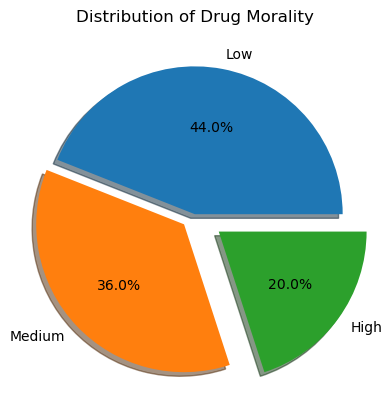

In [10]:
### Checking the drugs mortality 

morality_counts = drugs_df['drg_mortality'].value_counts()
explode = (0, 0.1, 0.2)
labels = morality_counts.index
plt.pie(morality_counts, autopct='%1.1f%%',labels=labels, shadow=True, explode=explode)
plt.title('Distribution of Drug Morality')
plt.show()

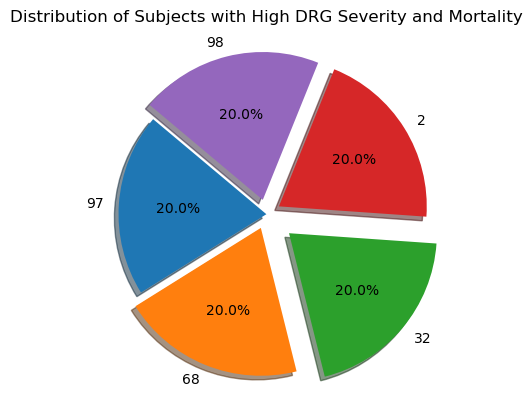

In [11]:
### Checking drugs severity in patient 

high_severity_mortality = drugs_df[(drugs_df['drg_severity'] == 'High') & (drugs_df['drg_mortality'] == 'High')]
subject_counts = high_severity_mortality['subject_id'].value_counts()
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140, explode = (0, 0.1, 0.2, 0.1, 0.1), shadow = True )
plt.title('Distribution of Subjects with High DRG Severity and Mortality')
plt.show()

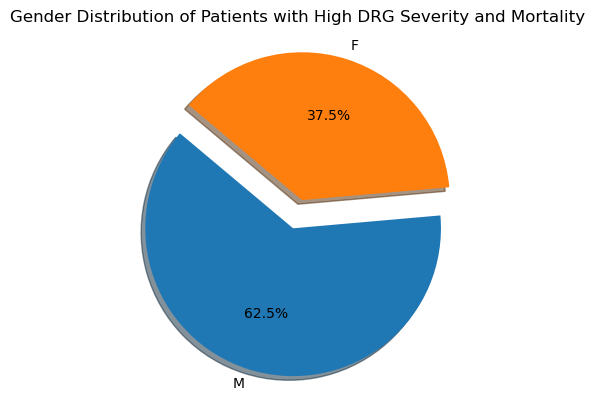

In [12]:
### Checking the Severity & Mortality onthe basis of gender 

high_severity_mortality = drugs_df[(drugs_df['drg_severity'] == 'High') & (drugs_df['drg_mortality'] == 'High')]
merged_drugs_patient = pd.merge(high_severity_mortality, patinent_df, on='subject_id')
gender_counts = merged_drugs_patient['gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, shadow=True, explode=(0.1, 0.1))
plt.title('Gender Distribution of Patients with High DRG Severity and Mortality')
plt.show()

In [13]:
### Checking the data distribution for the patient who were prescribed higg severity and high mortality prescription


high_risk_patients = drugs_df[(drugs_df['drg_severity'] == 'High') & (drugs_df['drg_mortality'] == 'High')]
high_risk_patients = pd.merge(high_risk_patients, patinent_df, on='subject_id')
print("High-Risk Patients:")
high_risk_patients

High-Risk Patients:


,row_id_x,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality,row_id_y,gender,expire_flag
0,6,97,1656,Type A,181,Drug 6,High,High,181,M,0
1,6,97,1656,Type A,181,Drug 6,High,High,183,M,0
2,9,68,1647,Type B,165,Drug 9,High,High,16,F,0
3,9,68,1647,Type B,165,Drug 9,High,High,19,F,0
4,18,32,1103,Type B,153,Drug 18,High,High,47,M,0
5,18,32,1103,Type B,153,Drug 18,High,High,66,M,1
6,18,32,1103,Type B,153,Drug 18,High,High,155,M,0
7,18,32,1103,Type B,153,Drug 18,High,High,170,M,0
8,18,32,1103,Type B,153,Drug 18,High,High,180,M,0
9,32,2,1977,Type A,178,Drug 32,High,High,67,F,0


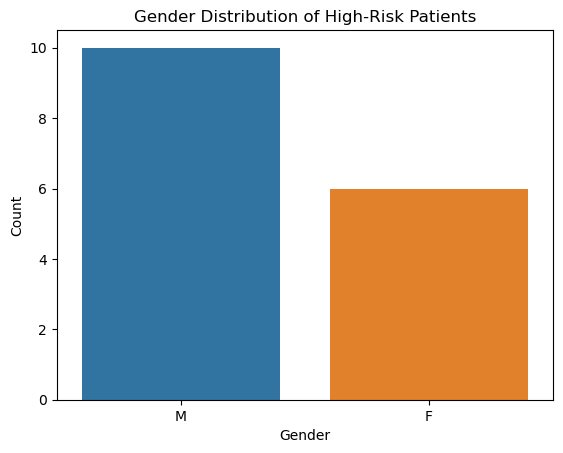

In [14]:
#### Checking the high risk gender distibution using graphical representation 

sns.countplot(data=high_risk_patients, x='gender')
plt.title('Gender Distribution of High-Risk Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [15]:
subject_ids_high_severity_mortality = high_severity_mortality['subject_id'].tolist()
print("Subject IDs with High DRG Severity and Mortality:", subject_ids_high_severity_mortality)

Subject IDs with High DRG Severity and Mortality: [97, 68, 32, 2, 98]


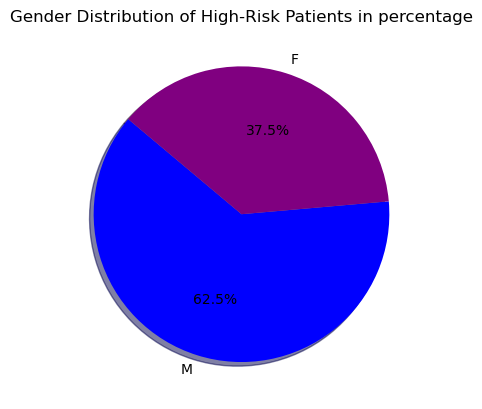

In [16]:
#### Checking the male and female percentae of high risk 

gender_counts = high_risk_patients['gender'].value_counts(normalize=True) * 100

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'purple'], shadow=True)
plt.title('Gender Distribution of High-Risk Patients in percentage')
plt.show()

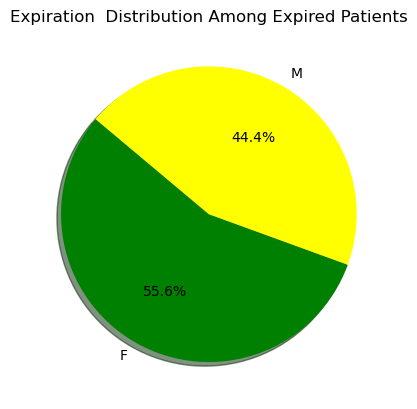

In [17]:
### Checking the data distribution of patient who have expired 

expired_patients = patinent_df[patinent_df['expire_flag'] == 1]
gender_counts = expired_patients['gender'].value_counts(normalize=True) * 100
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['Green', 'yellow'], shadow=True)
plt.title('Expiration  Distribution Among Expired Patients')
plt.show()

### Observations

#### Patient with ID's [ 97, 68, 32, 2, 98 ] have high morality & Severity patients 
#### These are also high risk patients 
#### As Compare to female, male patient are at high risk with the percentage rate of 62.5 % where as female patient at high rish with the percentage rate at 37.5 %
#### While Checking the expired patient details got that information that as compare to male female population is higher which means female population have high expiration rate which is 55.6% as compare to make expiration rate which is 44.4%

In [18]:
### Checking Diagonistic Dataset 

diagnostic_df.head(3)

,row_id,subject_id,hadm_id,seq_num,icd9_code
0,1,13,1521,3,D66
1,2,64,1782,1,D80
2,3,17,1272,3,D81


In [19]:
### Checking Common Diagonise for high risk patients 


high_risk_subject_ids = high_risk_patients['subject_id'].unique()
high_risk_diagnoses = diagnostic_df[diagnostic_df['subject_id'].isin(high_risk_subject_ids)]

In [20]:
### Checking the Common Diagonise details 

common_diagnoses = high_risk_diagnoses['icd9_code'].value_counts()

In [21]:
common_diagnoses

D98    1
D30    1
D51    1
D40    1
D96    1
D84    1
D12    1
D86    1
D52    1
Name: icd9_code, dtype: int64

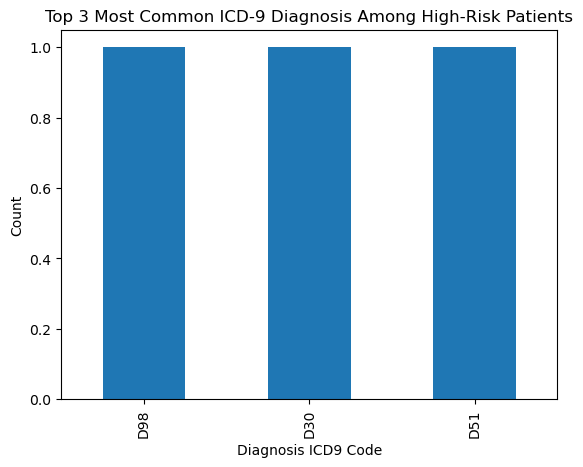

In [22]:
### Checking the Top most most common diagnosis

top_3_diagnoses = common_diagnoses.head(3)
top_3_diagnoses.plot(kind='bar')
plt.title('Top 3 Most Common ICD-9 Diagnosis Among High-Risk Patients')
plt.xlabel('Diagnosis ICD9 Code')
plt.ylabel('Count')
plt.show()

In [23]:
### Checking the morality rate Diagonise type 

merged_diagnoses = pd.merge(high_risk_diagnoses, patinent_df, on='subject_id')
diagnosis_counts = merged_diagnoses['icd9_code'].value_counts()
expired_counts = merged_diagnoses[merged_diagnoses['expire_flag'] == 1]['icd9_code'].value_counts()
mortality_rate_by_diagnosis = (expired_counts / diagnosis_counts) * 100
sorted_mortality_rates = mortality_rate_by_diagnosis.sort_values(ascending=False)

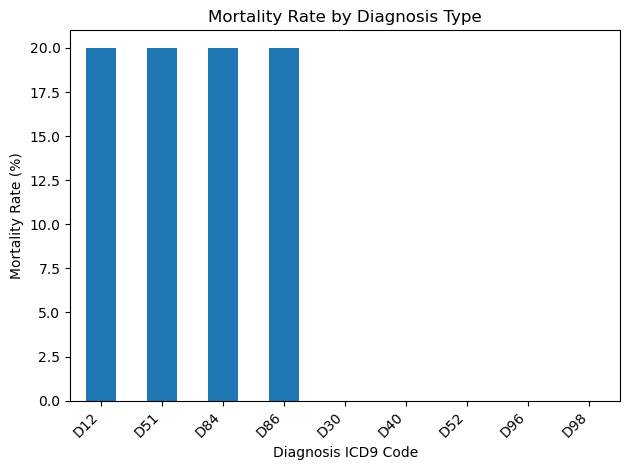

In [24]:
### Ploting Bar Chart for the same

sorted_mortality_rates.plot(kind='bar')
plt.title('Mortality Rate by Diagnosis Type')
plt.xlabel('Diagnosis ICD9 Code')
plt.ylabel('Mortality Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
diagnostic_df.head()

,row_id,subject_id,hadm_id,seq_num,icd9_code
0,1,13,1521,3,D66
1,2,64,1782,1,D80
2,3,17,1272,3,D81
3,4,9,1935,2,D48
4,5,41,1401,2,D48


## As dataset dont have any age columns in it so assuming "HADM_ID" as admission date of the patient and taking 2023 as the releasing date and calculating the details on the basis of that


In [26]:
high_risk_patients

,row_id_x,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality,row_id_y,gender,expire_flag
0,6,97,1656,Type A,181,Drug 6,High,High,181,M,0
1,6,97,1656,Type A,181,Drug 6,High,High,183,M,0
2,9,68,1647,Type B,165,Drug 9,High,High,16,F,0
3,9,68,1647,Type B,165,Drug 9,High,High,19,F,0
4,18,32,1103,Type B,153,Drug 18,High,High,47,M,0
5,18,32,1103,Type B,153,Drug 18,High,High,66,M,1
6,18,32,1103,Type B,153,Drug 18,High,High,155,M,0
7,18,32,1103,Type B,153,Drug 18,High,High,170,M,0
8,18,32,1103,Type B,153,Drug 18,High,High,180,M,0
9,32,2,1977,Type A,178,Drug 32,High,High,67,F,0


### Unable to get age as no age cols is in the dataset,, tried to create a dummy age but it didnt gave the proper result so unable to get the date details

In [27]:
### Checking the prescription details 

top_5_drug_codes = drugs_df['drg_code'].value_counts().head(5)

In [28]:
top_5_drug_codes

124    4
197    2
181    2
177    2
119    2
Name: drg_code, dtype: int64

In [29]:
drugs_df.head()

,row_id,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,1,97,1669,Type A,101,Drug 1,High,Low
1,2,36,1632,Type B,134,Drug 2,Medium,Low
2,3,3,1054,Type A,181,Drug 3,Medium,Medium
3,4,73,1911,Type A,177,Drug 4,High,Low
4,5,8,1011,Type A,119,Drug 5,High,Medium


In [30]:
### Taking the subject _id's for the very same 

top_subject_ids = drugs_df[drugs_df['drg_code'].isin(top_5_drug_codes.index)]['subject_id'].unique()

In [31]:
top_subject_ids

array([ 3, 73,  8, 97, 41, 13, 44,  2, 36, 69], dtype=int64)

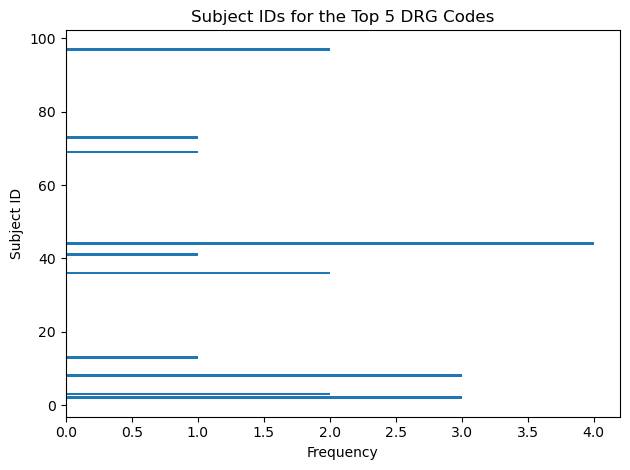

In [32]:
### Using Graphical Representation for that 

top_subject_ids_df = drugs_df[drugs_df['subject_id'].isin(top_subject_ids)][['subject_id', 'drg_code']]
subject_id_counts = top_subject_ids_df['subject_id'].value_counts()
plt.barh(subject_id_counts.index, subject_id_counts.values)
plt.title('Subject IDs for the Top 5 DRG Codes')
plt.xlabel('Frequency')
plt.ylabel('Subject ID')
plt.tight_layout()
plt.show()

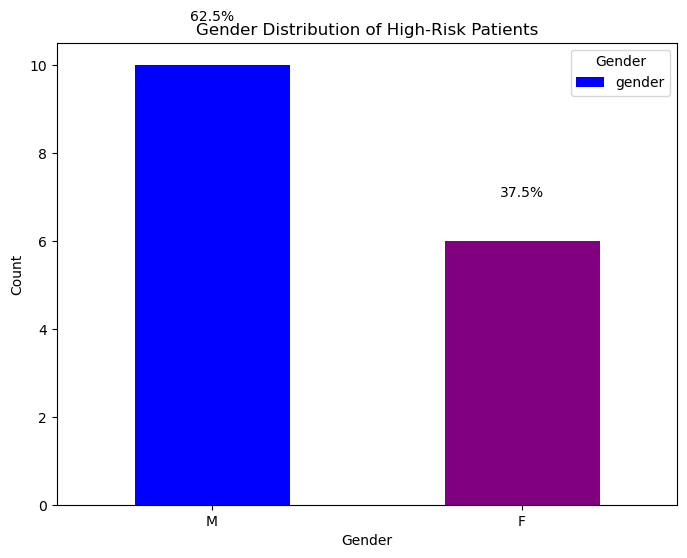

In [33]:
gender_distribution = high_risk_patients['gender'].value_counts()

total_count = gender_distribution.sum()
percentage_distribution = (gender_distribution / total_count) * 100

fig, ax = plt.subplots(figsize=(8, 6))
gender_distribution.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'purple'])
plt.title('Gender Distribution of High-Risk Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
for i, count in enumerate(gender_distribution):
    percentage = percentage_distribution[i]
    plt.text(i, count + 1, f'{percentage:.1f}%', ha='center', color='black')

plt.show()


### Observations


##### Patient with ID's [ 97, 68, 32, 2, 98 ] have high morality & Severity patients are the high risk patient
##### As Compare to female, male patient are at high risk with the percentage rate of 62.5 % where as female patient at high rish with the percentage rate at 37.5 %
##### While Checking the expired patient details got that information that as compare to male female population is higher which means female population have high mortality rate which is 55.6% as compare to make expiration rate which is 44.4%
##### Drugs prescription trend is high with high risk patients
##### As compare to gender male population have critically diagonses while female population have high mortality rate 